<a href="https://colab.research.google.com/github/VIJAYARAGUL362/PyTorch-Binary-classification---Based-on-Daniel-Bourke-s-Tutorial/blob/main/pytorch_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE DATASET

In [199]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

IMPORTING THE DATASET

     x_values  y_coordinate  circle
0    0.754246      0.231481       1
1   -0.756159      0.153259       1
2   -0.815392      0.173282       1
3   -0.393731      0.692883       1
4    0.442208     -0.896723       0
..        ...           ...     ...
995  0.244054      0.944125       0
996 -0.978655     -0.272373       0
997 -0.136900     -0.810012       1
998  0.670362     -0.767502       0
999  0.281057      0.963824       0

[1000 rows x 3 columns]


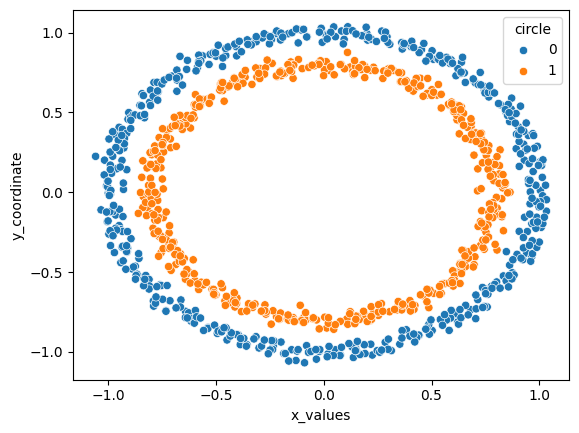

In [200]:
from sklearn.datasets import make_circles
x,y = make_circles(n_samples=1000,noise=0.03,random_state=42)
dataset = {
    'x_values':x[:,0],
    'y_coordinate':x[:,1],
    'circle':y
}
dataset = pd.DataFrame(dataset)
print(dataset)

sns.scatterplot(x=dataset['x_values'],y=dataset['y_coordinate'],hue=dataset['circle'])
plt.show()

CONVERTING THE DATASET INTO TENSORS

In [201]:
X = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

SPLITTTING THE DATASET

In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

CREATING A MODEL AND DEVICE AGNOSTIC CODE

In [203]:
import torch
from torch import nn
device = "cpu"
device

'cpu'

STRUCTURE OF OUR MODEL

In [204]:
class Classifier(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=5) # SETTING THE NUMBER OF INPUT LAUERS TO THE NUMER OF FEATURES WE WANT TO TAKS AS INPUT FROM THE X VARIABLE
        self.layer_2 = nn.Linear(in_features=5,out_features=1) # SETTING THE NUMBER OF INPUT LAYERS TO THE LAYER SIZE OF THE PREVIOUS LAYER

    def forward(self,x): # FORWARD PASS :- PASSSING THE INPUT
        return self.layer_2(self.layer_1(x)) # RESULT WILL BE GIVEN

CREATING INSTANCE OF THE MODEL

In [205]:
torch.manual_seed(42)
classification_model = Classifier()        # INSTANCE OF THE CLASSIFIER MODEL
classification_model.to(device)

# classification_model.to(device)
classification_model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('layer_2.bias', tensor([-0.2060]))])

CHOSSING THE OPTIMIZER AND THE LOSS FUNCTION

In [206]:
# loss function
loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optim = torch.optim.SGD(params=classification_model.parameters(),lr=0.1)

MOVING THE DATASET TO TENSOR AND CHANGING THE DATATYPE

In [207]:
X_test = torch.tensor(X_test).to(device)
X_test = X_test.type(torch.float32)
y_test = torch.tensor(y_test).to(device)
y_test = y_test.type(torch.float32)

X_train = torch.tensor(X_train).to(device)
X_train = X_train.type(torch.float32)
y_train = torch.tensor(y_train).to(device)
y_train = y_train.type(torch.float32)

<ipython-input-207-5d7d97c9587f>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test).to(device)
<ipython-input-207-5d7d97c9587f>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train).to(device)


PREDICTING SOME RESULTS

In [208]:
classification_model.eval()
with torch.inference_mode():
    y_pred = classification_model(X_test).squeeze()
    y_pred_probabilities = torch.sigmoid(y_pred)

y_pred_probabilities = torch.tensor(y_pred_probabilities).to(device)
y_pred_probabilities = y_pred_probabilities.type(torch.float32)
y_pred_probabilities = torch.round(y_pred_probabilities)

print(y_pred_probabilities)
print(y_pred)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])
tensor([-0.1269, -0.0967, -0.1908, -0.1089, -0.1667, -0.1484, -0.0826, -0.0946,
        -0.1918, -0.0944, -0.1256, -0.1183, -0.

<ipython-input-208-0ae0710449a1>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred_probabilities = torch.tensor(y_pred_probabilities).to(device)


EVALUTION METRICS


In [209]:
def accuracy_fn(y_test,y_pred):
    correct = torch.eq(y_test,y_pred).sum().item()
    acccuracy = correct/len(torch.tensor(y_test)) *100

    return acccuracy

TRAINING THE MODEL

In [210]:
torch.manual_seed(42)


epochs = 1000
training_loss = []
test_loss = []
epoch_list = []

for epoch in range(epochs):

    # PUTTTING THE MODEL ON TRAINING MODE
    classification_model.train()

    # GIVING INPUT TO THE MODEL
    y_pred1 = classification_model.forward(X_train).squeeze()
    y_pred1_probabilities = torch.sigmoid(y_pred1)
    y_pred1_probabilities = torch.round(y_pred1_probabilities)


    # CALCULATING THE LOSS
    loss = loss_fn(y_pred1,y_train)
    if epoch%10 == 0:
        training_loss.append(loss)
        accuracy_train_score = accuracy_fn(y_train,y_pred1_probabilities)

    # OPTIMIZER ZERO GRAD
    optim.zero_grad()

    # BACK PROPAGATION
    loss.backward()

    # OPTIMIZING THE WEIGTHS
    optim.step()

    # VALIDATING THE MODEL
    classification_model.eval()
    with torch.inference_mode():

        y_pred_valid = classification_model(X_train).squeeze()
        y_pred_valid1 = torch.sigmoid(y_pred_valid)
        y_pred_valid1 = torch.round(y_pred_valid1)

        testing_loss = loss_fn(y_pred_valid,y_train)
        accuracy_test_loss = accuracy_fn(y_train,y_pred_valid1)

        if epoch%10 == 0:
            test_loss.append(testing_loss)
            epoch_list.append(epoch)
    print(f"The epoch is {epoch}. The training loss is {loss} and the accuracy is {accuracy_train_score} || The test loss is {testing_loss} and the accuracy is {accuracy_test_loss}")



<ipython-input-209-1bdc9f0d80d2>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  acccuracy = correct/len(torch.tensor(y_test)) *100


The epoch is 0. The training loss is 0.6956854462623596 and the accuracy is 50.0 || The test loss is 0.6954331994056702 and the accuracy is 50.0
The epoch is 1. The training loss is 0.6954331994056702 and the accuracy is 50.0 || The test loss is 0.6952055096626282 and the accuracy is 50.0
The epoch is 2. The training loss is 0.6952055096626282 and the accuracy is 50.0 || The test loss is 0.695000171661377 and the accuracy is 50.0
The epoch is 3. The training loss is 0.695000171661377 and the accuracy is 50.0 || The test loss is 0.6948147416114807 and the accuracy is 50.0
The epoch is 4. The training loss is 0.6948147416114807 and the accuracy is 50.0 || The test loss is 0.6946473717689514 and the accuracy is 50.0
The epoch is 5. The training loss is 0.6946473717689514 and the accuracy is 50.0 || The test loss is 0.6944963335990906 and the accuracy is 50.0
The epoch is 6. The training loss is 0.6944963335990906 and the accuracy is 50.0 || The test loss is 0.6943601369857788 and the accu

In [211]:
classification_model.eval()
with torch.inference_mode():
    y_pred = classification_model(X_test).squeeze()


y_pred = torch.tensor(y_pred).to(device)
y_pred = y_pred.type(torch.float32)
y_pred = torch.round(y_pred)
print(torch.eq(y_pred,y_test))


tensor([False,  True, False,  True, False, False,  True,  True, False,  True,
         True, False,  True, False,  True, False, False,  True, False,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True, False,
        False,  True,  True, False,  True, False, False, False, False, False,
        False, False, False,  True,  True, False,  True,  True, False, False,
         True,  True,  True,  True, False,  True, False, False, False,  True,
        False,  True,  True, False, False, False, False,  True,  True,  True,
        False,  True,  True, False, False, False, False,  True,  True, False,
         True, False,  True, False, False, False,  True,  True,  True,  True,
        False, False, False, False, False,  True, False, False,  True, False,
         True,  True, False, False,  True,  True, False,  True,  True, False,
        False, False,  True, False, False,  True, False,  True, False,  True,
        False,  True,  True, False, False,  True, False, False, 

<ipython-input-211-f0d7326f82e4>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = torch.tensor(y_pred).to(device)


VISULAIZNG THE RESULT

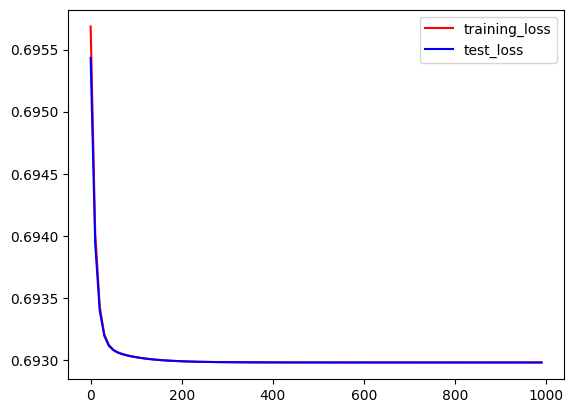

In [212]:
plt.plot(epoch_list,torch.tensor(training_loss).numpy(),c='r',label="training_loss")
plt.plot(epoch_list,torch.tensor(test_loss).numpy(),c='b',label="test_loss")
plt.legend()
plt.show()

IMPORTING CODE FROM THE GITHUB

In [213]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("the file is already there")
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

the file is already there


In [214]:
from helper_functions import plot_predictions,plot_decision_boundary

VISUALIZING THE RESULTS

Text(0.5, 1.0, 'test')

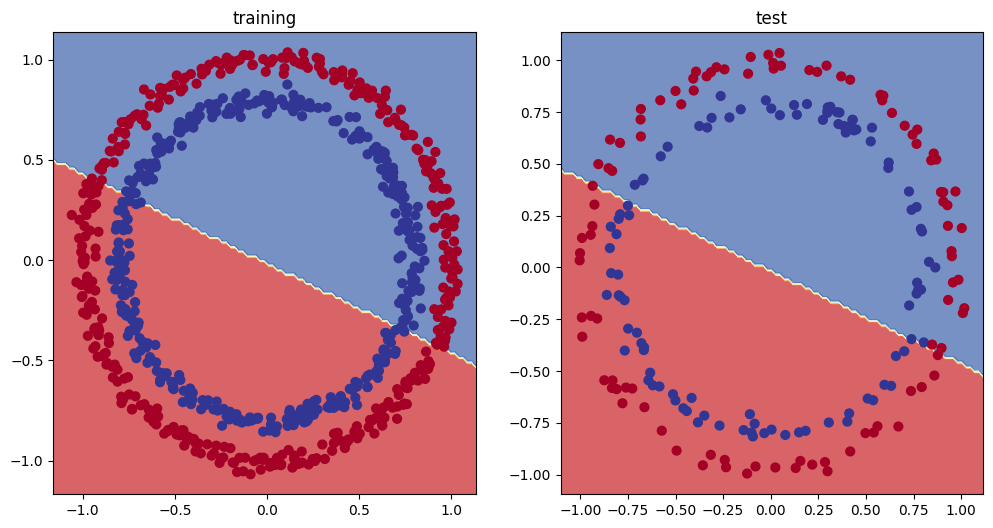

In [215]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_decision_boundary(classification_model,X_train,y_train)
plt.title("training")
plt.subplot(1,2,2)
plot_decision_boundary(classification_model,X_test,y_test)
plt.title("test")

CREATING A NEW MODEL (IMPROVING)

In [216]:
class upgraded_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)

    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = upgraded_model().to(device)
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

LOSS FUNCCTION AND OPTIMIZER

In [217]:
loss_fn_1 = nn.BCEWithLogitsLoss()

optim_1 = torch.optim.SGD(params=model_1.parameters(),lr = 0.01)

In [218]:
X_train.shape

torch.Size([800, 2])

In [219]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

epoch_list_1 = []
training_loss_list = []
testing_loss_list = []


for epoch in range(epochs):

    # model training mode
    model_1.train()

    # giving input to the model
    y_pred_new_model_training = model_1.forward(X_train).squeeze()
    y_pred_new_model_training_probalbilities = torch.sigmoid(y_pred_new_model_training)
    y_pred_new_model_training_probalbilities = torch.round(y_pred_new_model_training_probalbilities)
    # y_pred_new_model_training.squeeze()

    # calculating the loss
    # print(y_pred_new_model_training)
    training_loss_1 = loss_fn(y_pred_new_model_training,y_train)


    if epoch%100 == 0:
        training_loss_list.append(training_loss_1)

    # optimizer zero grad
    optim_1.zero_grad()

    # Back propagation
    training_loss_1.backward()

    # optimizer
    optim_1.step()

    # Evaluating the model
    model_1.eval()
    with torch.inference_mode():
        y_pred_new_model_testing = model_1.forward(X_train).squeeze()
        y_pred_new_model_testing_probabilities = torch.sigmoid(y_pred_new_model_testing)
        y_pred_new_model_testing_probabilities = torch.round(y_pred_new_model_testing_probabilities)

        testing_loss_1 = loss_fn(y_pred_new_model_testing,y_train)
        accuracy_train_score = accuracy_fn(y_train,y_pred_new_model_training_probalbilities)
        accuracy_test_score = accuracy_fn(y_train,y_pred_new_model_testing_probabilities)

        if epoch%100 == 0:
            testing_loss_list.append(testing_loss_1)
            epoch_list_1.append(epoch)

            print(f"The epoch is {epoch}. The training loss is {training_loss_1} and the accuracy is {accuracy_train_score} || The test loss is {testing_loss_1} and the accuracy is {accuracy_test_score}")






<ipython-input-209-1bdc9f0d80d2>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  acccuracy = correct/len(torch.tensor(y_test)) *100


The epoch is 0. The training loss is 0.6939550638198853 and the accuracy is 50.875 || The test loss is 0.6939517259597778 and the accuracy is 50.875
The epoch is 100. The training loss is 0.6936901807785034 and the accuracy is 50.24999999999999 || The test loss is 0.693688154220581 and the accuracy is 50.24999999999999
The epoch is 200. The training loss is 0.6935146450996399 and the accuracy is 50.125 || The test loss is 0.6935131549835205 and the accuracy is 50.125
The epoch is 300. The training loss is 0.6933882236480713 and the accuracy is 50.5 || The test loss is 0.6933871507644653 and the accuracy is 50.5
The epoch is 400. The training loss is 0.6932938098907471 and the accuracy is 50.375 || The test loss is 0.6932930946350098 and the accuracy is 50.375
The epoch is 500. The training loss is 0.6932222843170166 and the accuracy is 49.875 || The test loss is 0.6932216882705688 and the accuracy is 49.875
The epoch is 600. The training loss is 0.693167507648468 and the accuracy is 49

In [220]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5396,  0.5864],
                      [-0.1628,  0.6511],
                      [-0.1572,  0.1415],
                      [-0.3458,  0.4145],
                      [ 0.6190, -0.5210],
                      [ 0.6191,  0.1348],
                      [ 0.5211,  0.0951],
                      [ 0.3390, -0.1008],
                      [ 0.5363,  0.0999],
                      [-0.3382,  0.1759]])),
             ('layer_1.bias',
              tensor([-0.3256, -0.0831, -0.2871,  0.4692, -0.5579, -0.3261, -0.1995, -0.4250,
                       0.0673, -0.6979])),
             ('layer_2.weight',
              tensor([[ 0.2935, -0.2669,  0.2435,  0.0513, -0.0993,  0.2018,  0.0546,  0.2583,
                        0.0400, -0.1016],
                      [ 0.0703, -0.0889,  0.1342,  0.2849,  0.1764, -0.1501,  0.1727,  0.0513,
                        0.1506, -0.1894],
                      [-0.2993, -0.1192, -0.2436,  0.2571,  0.0970,  0.1

VISULAIZING THE MODEL PERFORMANCE


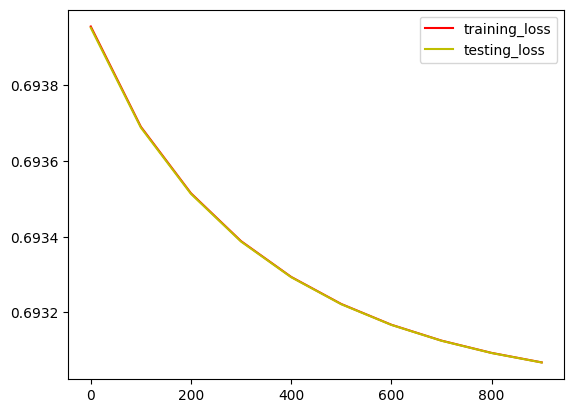

In [221]:
# with torch.inference_mode():
#      y_pred = model_1.forward(X_test)
#      y_pred_probabilities = torch.sigmoid(y_pred)
#      y_pred_probabilities = torch.round(y_pred_probabilities)
#      print(y_pred_probabilities)

# print(torch.eq(y_pred_probabilities,y_test))

# plt.figure(figsize=(12,6))

# plt.subplot(1,2,1)
# plt.tilte("training_loss")
plt.plot(epoch_list_1,torch.tensor(training_loss_list).numpy(),c="r",label = "training_loss")
# plt.subplot(1,2,2)
# plt.title("test_loss")
plt.plot(epoch_list_1,torch.tensor(testing_loss_list).numpy(),c="y",label="testing_loss")
plt.legend()
plt.show()

VISULAIZING THE MODEL IN A DIAGRAM

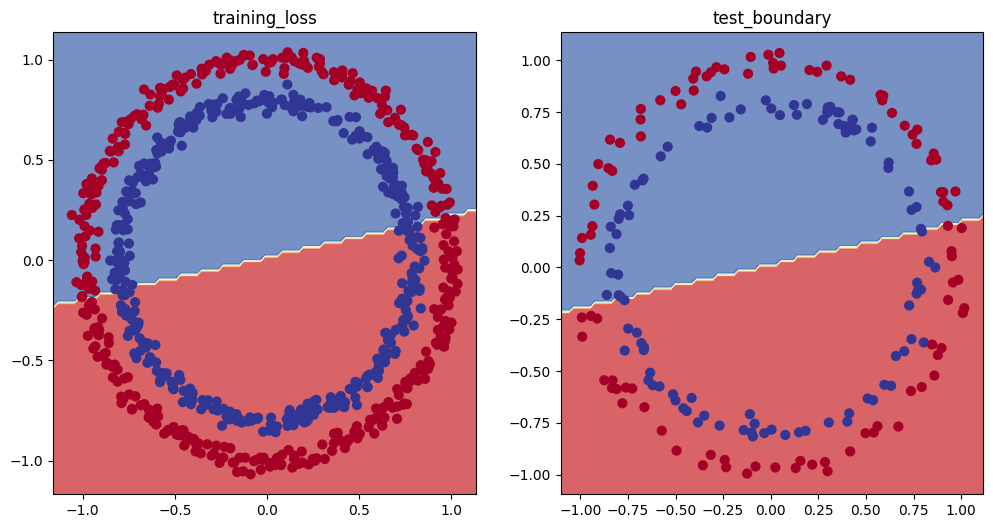

In [222]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("training_loss")
plot_decision_boundary(model_1,X_train,y_train)

plt.subplot(1,2,2)
plt.title("test_boundary")
plot_decision_boundary(model_1,X_test,y_test)


device agnostic code

In [223]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

CHANGING THE DATASET

In [224]:
import torch
from helper_functions import plot_decision_boundary,plot_predictions
WEIGHT = 0.5
BIAS = 0.2
START = 0
END = 1
STEP = 0.01


x = torch.arange(START,END,STEP)
# print(x)

y = WEIGHT*x+BIAS
x,y = x.to(device),y.to(device)

SPLITTING THE NEW DATASET

In [225]:
x_test,x_train = x[80:],x[:80]
y_test,y_train = y[80:],y[:80]

VISULAIZING THE DATASET

<ipython-input-226-55aad9fdb96b>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_predictions(train_data=torch.tensor(x_train).cpu(),train_labels=torch.tensor(y_train).cpu(),test_data=torch.tensor(x_test).cpu(),test_labels=torch.tensor(y_test).cpu())


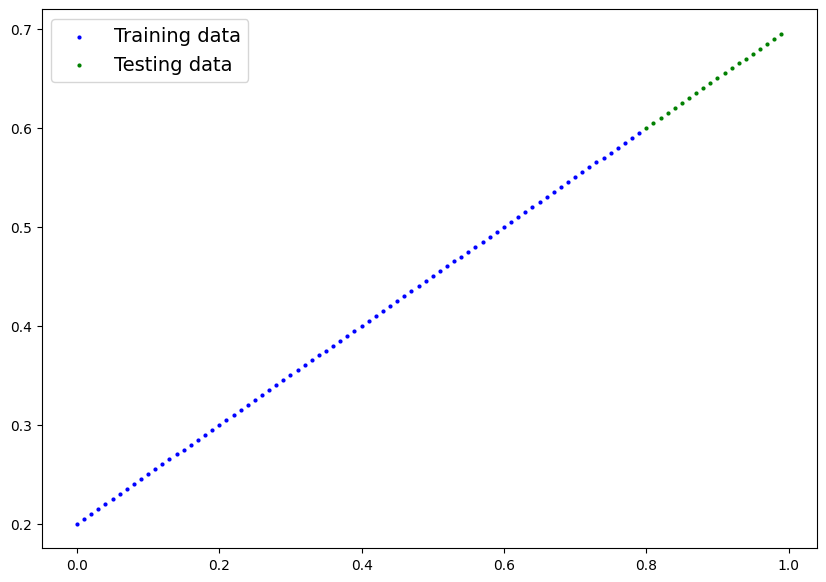

In [226]:
# plt.figure(figsize=(8,8))
plot_predictions(train_data=torch.tensor(x_train).cpu(),train_labels=torch.tensor(y_train).cpu(),test_data=torch.tensor(x_test).cpu(),test_labels=torch.tensor(y_test).cpu())

In [227]:
from torch import nn
new_model = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
              )
new_model.to(device)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

LOSS FUNCTION AND OPTIMIZER

In [228]:
# LOSS FUNCTION
new_loss_function = nn.L1Loss()

# OPTIMIZER
new_optimizer = torch.optim.SGD(params=new_model.parameters(),lr=0.01)

TRAINING LOOP

In [229]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
training_loss = []
test_loss_list = []
epoch_list = []

for epoch in range(epochs):

    # model in training
    new_model.train()

    # model giving input
    y_pred_new = new_model.forward(x_train.unsqueeze(1))
    # CALCULATING THE LOSS
    loss_training  = new_loss_function(y_pred_new,y_train.unsqueeze(1))
    if epoch%100 == 0:
        training_loss.append(loss_training)
        epoch_list.append(epoch)
        # train_accuracy = accuracy_fn(y_train,y_pred_probabilities)

    # ZERO GRAD
    new_optimizer.zero_grad()

    # BACK PROPAGATION
    loss_training.backward()

    # GRADIENT DESCENT
    new_optimizer.step()


    # TESTINNG THE MODEL
    new_model.eval()
    with torch.inference_mode():
        y_test_pred = new_model.forward(x_test.unsqueeze(1))

        test_loss = new_loss_function(y_test_pred,y_test.unsqueeze(1))
        if epoch%100 == 0:
            test_loss_list.append(test_loss)
            print(f"the training_loss is {loss_training}")
            print(f"the testing_loss is {test_loss}")


the training_loss is 0.5808585286140442
the testing_loss is 0.6320288181304932
the training_loss is 0.02233128249645233
the testing_loss is 0.004355713725090027
the training_loss is 0.02232656255364418
the testing_loss is 0.0017890662420541048
the training_loss is 0.018825458362698555
the testing_loss is 0.0027748525608330965
the training_loss is 0.017607461661100388
the testing_loss is 0.0036551267839968204
the training_loss is 0.01678571105003357
the testing_loss is 0.0030306221451610327
the training_loss is 0.016765370965003967
the testing_loss is 0.0032109261956065893
the training_loss is 0.015639571473002434
the testing_loss is 0.002941969083622098
the training_loss is 0.016042320057749748
the testing_loss is 0.0033405304420739412
the training_loss is 0.014990398660302162
the testing_loss is 0.0027854235377162695


In [230]:
new_model.eval()
with torch.inference_mode():
    y_pred_final = new_model(x_test.unsqueeze(1))
print(y_pred_final,y_test)

tensor([[0.5700],
        [0.5746],
        [0.5793],
        [0.5839],
        [0.5885],
        [0.5931],
        [0.5978],
        [0.6024],
        [0.6070],
        [0.6116],
        [0.6163],
        [0.6209],
        [0.6255],
        [0.6301],
        [0.6348],
        [0.6394],
        [0.6440],
        [0.6487],
        [0.6533],
        [0.6579]], device='cuda:0') tensor([0.6000, 0.6050, 0.6100, 0.6150, 0.6200, 0.6250, 0.6300, 0.6350, 0.6400,
        0.6450, 0.6500, 0.6550, 0.6600, 0.6650, 0.6700, 0.6750, 0.6800, 0.6850,
        0.6900, 0.6950], device='cuda:0')


VISUALIZING THE RESULT

<ipython-input-231-fa4e04e37f95>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plot_predictions(train_data=torch.tensor(x_train).cpu(),train_labels=torch.tensor(y_train).cpu(),test_data=torch.tensor(x_test).cpu(),test_labels=torch.tensor(y_test).cpu(),predictions=torch.tensor(y_pred_final).cpu())


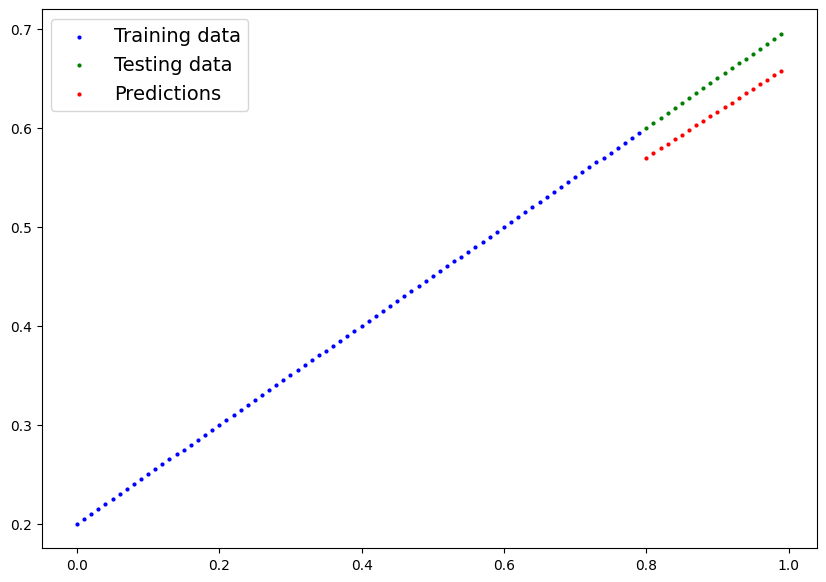

In [231]:
# plot_predictions(x_train,y_train,x_test,y_test,predictions=y_pred_final)
plot_predictions(train_data=torch.tensor(x_train).cpu(),train_labels=torch.tensor(y_train).cpu(),test_data=torch.tensor(x_test).cpu(),test_labels=torch.tensor(y_test).cpu(),predictions=torch.tensor(y_pred_final).cpu())

PLOT PREDICTION

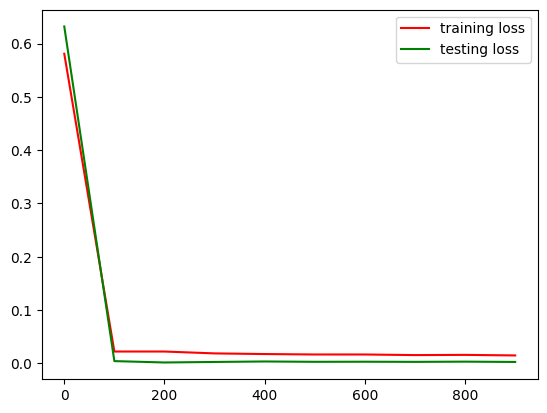

In [232]:
plt.plot(epoch_list,torch.tensor(training_loss).numpy(),c = "r", label = "training loss")
plt.plot(epoch_list,torch.tensor(test_loss_list).numpy(),c= "g",label="testing loss")
plt.legend()
plt.show()

THE MODEL HAS LAYERS THAT ARE LINEAR SO IT CAN ONLY FIT CORRECTLY ON LINEAR DATA SINCE WE ARE HAVING A NON LINEAR DATA WE ARE MOVING TOWARDS NON-LINEAR FUNCTION

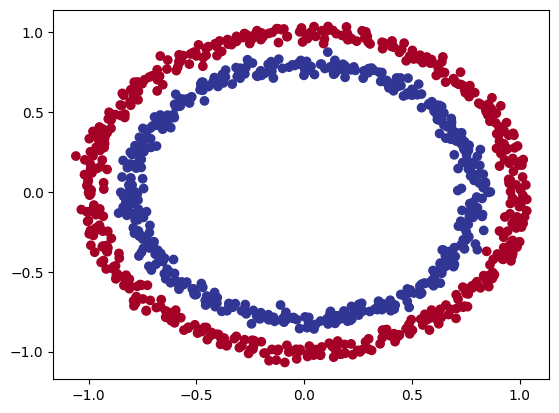

In [233]:
from sklearn.datasets import make_circles
import torch
import matplotlib.pyplot as plt
from torch import nn
X,y = make_circles(n_samples=1000,noise=0.03,random_state=42)

plt.scatter(X[:,0],X[:,1],cmap=plt.cm.RdYlBu,c=y)
plt.show()

MOVING THE FEATURES INTO THE TENSOR


In [234]:
print(type(X))
X = torch.from_numpy(X).type(torch.float) # sharing the memory
y = torch.from_numpy(y).type(torch.float)
print(type(X))
X = X.to("cuda")
y = y.to("cuda")
print(X.device)

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
cuda:0


In [235]:
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [236]:
# creating the model
class ClassficationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2,out_features=10)
        self.layer2 = nn.Linear(in_features=10,out_features=10)
        self.layer3 = nn.Linear(in_features=10,out_features =1)
        self.relu = nn.ReLU()

    def forward(self,x:float)->float:
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


In [237]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

print(device)

cuda


In [238]:
# creating a instance for the model
non_linear_model = ClassficationModel().to(device)
non_linear_model

ClassficationModel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [239]:
next(non_linear_model.parameters()).device

device(type='cuda', index=0)

In [240]:
# chossing the loss and optimizer
loss_func = nn.BCEWithLogitsLoss()

# optimizer
optim = torch.optim.SGD(params=non_linear_model.parameters(),lr=0.1)

In [241]:
x_train.device

device(type='cuda', index=0)

In [242]:
# training the model
epochs = 10000
non_linear_model.to(device)

epoch_list = []
training_loss = []
testing_loss = []

for epoch in range(epochs):
    # model on training mode
    non_linear_model.train()

    # Giving input to the model
    logits = non_linear_model(x_train).squeeze()


    # calculating the loss
    loss = loss_func(logits,y_train)
    pred_train = torch.round(torch.sigmoid(logits))
    accur_train = accuracy_fn(y_test=y_train,y_pred=pred_train)

    # optimizer zero grad
    optim.zero_grad()

    # backward propagation
    loss.backward()

    #Gradient decent
    optim.step()


    # validating the model
    non_linear_model.eval()
    with torch.inference_mode():
        logits_test = non_linear_model(x_test).squeeze()
        loss_test = loss_func(logits_test,y_test)
        pred_test = torch.round(torch.sigmoid(logits_test))
        accur_test = accuracy_fn(y_test=y_test,y_pred=pred_test)
        if epoch %100 == 0:
            print(f"The training loss is {loss:4f} and the accuracy is {accur_train:.2f}%|| the test loss is {loss_test:2f} and the accuracy is {accur_test:.2f} || no of epoch is {epoch}")
            epoch_list.append(epoch)
            testing_loss.append(loss_test)
            training_loss.append(loss)



The training loss is 0.692946 and the accuracy is 50.00%|| the test loss is 0.693188 and the accuracy is 50.00 || no of epoch is 0


<ipython-input-209-1bdc9f0d80d2>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  acccuracy = correct/len(torch.tensor(y_test)) *100


The training loss is 0.691153 and the accuracy is 52.88%|| the test loss is 0.691024 and the accuracy is 52.50 || no of epoch is 100
The training loss is 0.689774 and the accuracy is 53.37%|| the test loss is 0.689396 and the accuracy is 55.00 || no of epoch is 200
The training loss is 0.687949 and the accuracy is 53.00%|| the test loss is 0.687232 and the accuracy is 56.00 || no of epoch is 300
The training loss is 0.685168 and the accuracy is 52.75%|| the test loss is 0.684115 and the accuracy is 56.50 || no of epoch is 400
The training loss is 0.681022 and the accuracy is 52.75%|| the test loss is 0.679412 and the accuracy is 56.50 || no of epoch is 500
The training loss is 0.675149 and the accuracy is 54.50%|| the test loss is 0.672851 and the accuracy is 56.00 || no of epoch is 600
The training loss is 0.666589 and the accuracy is 58.38%|| the test loss is 0.663216 and the accuracy is 59.00 || no of epoch is 700
The training loss is 0.651596 and the accuracy is 64.00%|| the test l

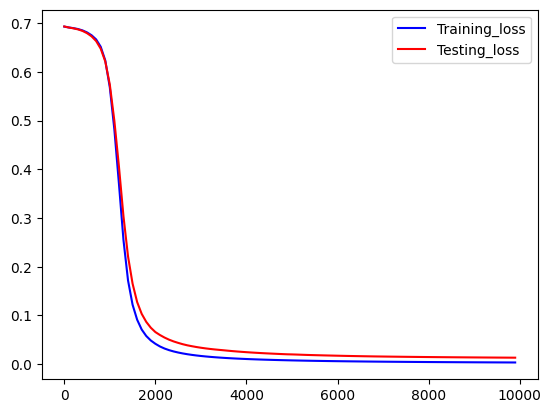

In [243]:
# learning curve
plt.plot(epoch_list,torch.tensor(training_loss).numpy(),c="b",label="Training_loss")
plt.plot(epoch_list,torch.tensor(testing_loss).numpy(),c="r",label="Testing_loss")
plt.legend()
plt.show()

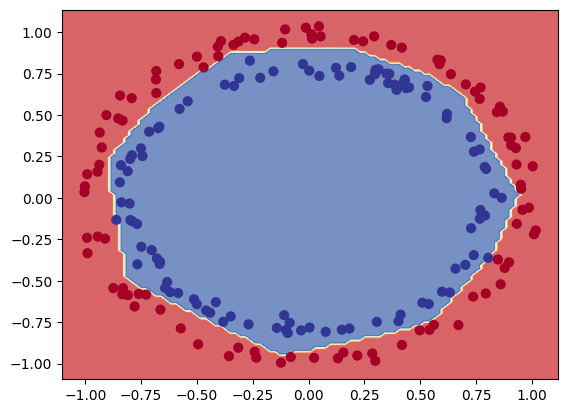

In [244]:
plot_decision_boundary(non_linear_model,x_test,y_test)

In [245]:
non_linear_model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.9036,  1.5960],
                      [-0.7052,  2.7153],
                      [-0.1549,  0.1427],
                      [-3.0099, -0.3671],
                      [ 0.8623, -2.9784],
                      [ 1.7082, -0.0545],
                      [ 2.3630,  0.5450],
                      [ 0.3410, -0.0998],
                      [ 0.5872,  0.8908],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.2418, -1.2439, -0.2872, -0.6927, -0.7581, -0.8380, -0.9570, -0.4252,
                      -0.1943, -0.6984])),
             ('layer2.weight',
              tensor([[-0.0179, -0.9311,  0.2441, -0.4759, -0.5108, -0.1861, -0.4244,  0.2555,
                       -0.0917, -0.0997],
                      [ 1.6224,  2.6898,  0.1331,  2.8226,  2.7405,  1.5594,  2.2915,  0.0566,
                        0.9245, -0.1927],
                      [-0.3130, -0.1244, -0.2426,  0.1545,  0.0910,  0.1310

# CREATING OUR OWN ACTIVATION FUNCTIONS

In [263]:
B = torch.arange(-10,10,1,dtype=torch.float32
                 )
B.dtype

torch.float32

In [264]:
B

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

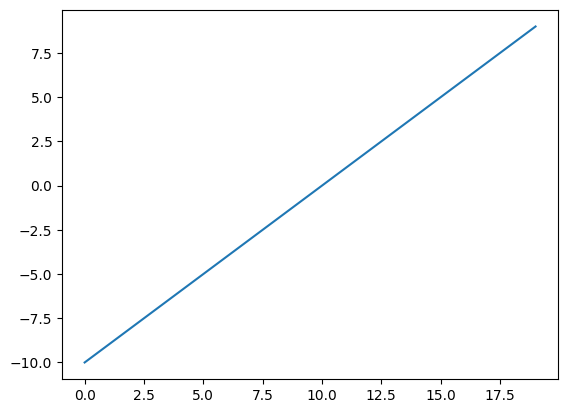

In [265]:
plt.plot(B)

In [266]:
def sigmoid(x):
    return 1/(1+(torch.exp(-x)))

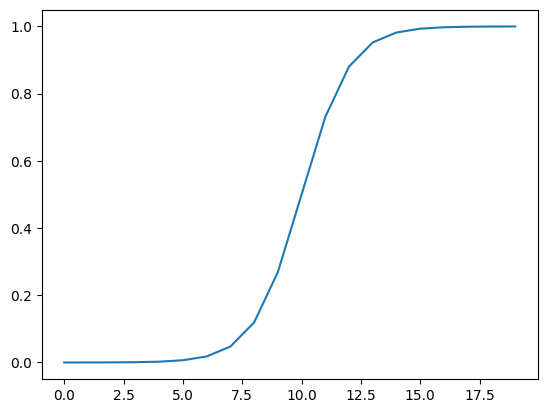

In [267]:
plt.plot(sigmoid(B))